# 1. Kütüphanelerin Yüklenmesi

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Veri Setini Yükleme

In [73]:
# Veri ön işleme adımında oluşturulan veriyi yüklüyoruz
df = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\ÇAŞLIŞMA\Customer Churn Analysis\processed_data.csv")

In [74]:
# İlk 10 satıra bakalım
df.head(10)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2,5,2017-08-17,0,0,0,0,17,300.63,53005.25,17.0,781.75,1,1,0,3,-1,0
1,32,0,1,4,2017-08-28,0,0,0,1,16,306.34,12838.38,10.0,697.62,1,0,1,2,1,0
2,44,0,0,0,2016-11-11,1,0,0,0,14,516.16,21027.00,22.0,500.69,0,1,1,0,0,1
3,37,1,1,0,2016-10-29,1,0,0,1,11,53.27,25239.56,6.0,567.66,0,1,1,1,0,1
4,31,0,1,0,2017-09-12,0,1,1,1,20,113.13,24483.66,16.0,663.06,0,1,1,2,0,1
5,13,1,1,1,2016-01-08,0,0,0,0,23,433.62,13884.77,24.0,722.27,1,0,1,1,-1,0
6,21,1,0,1,2015-03-19,1,0,0,1,10,55.38,8982.50,28.0,756.21,1,0,1,0,-1,0
7,42,1,0,0,2016-07-12,0,1,2,2,19,429.11,44554.82,24.0,568.08,0,1,1,1,0,1
8,44,1,2,3,2016-12-14,0,2,1,2,15,191.07,18362.31,20.0,697.62,1,0,1,0,0,0
9,45,0,0,0,2016-11-30,0,0,0,0,10,97.31,19244.16,28.0,706.23,0,1,1,4,0,1


# 3. Tarih Formatı ve Kodlama

In [75]:
# Tarih sütununu doğru formatta datetime türüne çeviriyoruz
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [76]:
# Veri hakkında bilgi alalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  int64         
 2   region_category               36992 non-null  int64         
 3   membership_category           36992 non-null  int64         
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  int64         
 6   preferred_offer_types         36992 non-null  int64         
 7   medium_of_operation           36992 non-null  int64         
 8   internet_option               36992 non-null  int64         
 9   days_since_last_login         36992 non-null  int64         
 10  avg_time_spent                36992 non-null  float64       
 11  avg_transaction_value       

# 4. Veri Setinin Bölünmesi

In [77]:
# Bağımsız ve bağımlı değişkenleri ayıralım
X = df.drop(columns=['churn_risk_score', "joining_date"])
y = df['churn_risk_score']

In [78]:
# Eğitim ve test verisine ayırıyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Özellik Ölçeklendirme

In [79]:
# Veriyi ölçeklendiriyoruz (StandardScaler kullanarak)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Model Değerlendirme Kütüphanelerinin Yüklenmesi

In [80]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 7. Lojistik Regresyon Modeli

In [81]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=2000, random_state=42)

# Lojistik Regresyon Modeli ile test seti üzerinde tahmin yapma
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Model doğruluğunu çapraz doğrulama ile değerlendiriyoruz
logreg_cv_score = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [82]:
print(f'Logistic Regression Modeli için Çapraz Doğrulama Skorları: {logreg_cv_score}')

Logistic Regression Modeli için Çapraz Doğrulama Skorları: [0.79540463 0.80148674 0.79472884 0.80669145 0.80179115]


In [83]:
print(f'Ortalama doğruluk: {logreg_cv_score.mean():.2f}')

Ortalama doğruluk: 0.80


In [84]:
print(f'Lojistik Regresyon Modeli Doğruluğu: {accuracy_score(y_test, y_pred_logreg):.2f}')

Lojistik Regresyon Modeli Doğruluğu: 0.79


In [85]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_logreg)}')

Confusion Matrix:
[[2476  901]
 [ 619 3403]]


## 7.1. Sonuçların Görselleştirilmesi

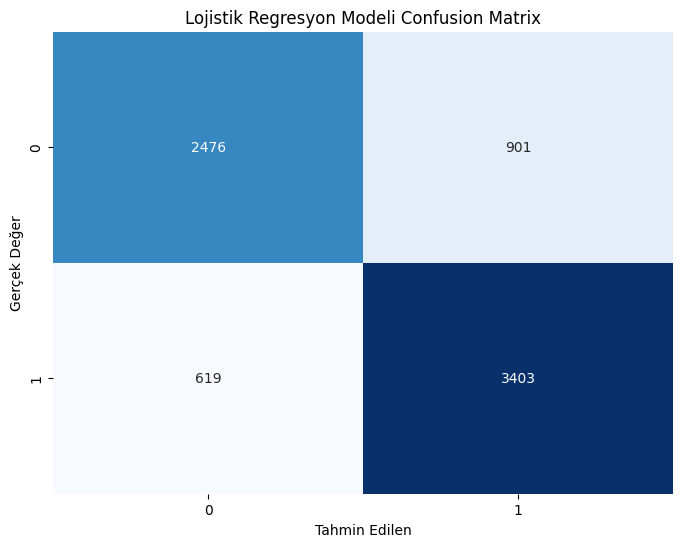

In [86]:
# Modelin performansını değerlendirecek confusion matrix görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Lojistik Regresyon Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

## 7.2. Raporlama

In [87]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77      3377
           1       0.79      0.85      0.82      4022

    accuracy                           0.79      7399
   macro avg       0.80      0.79      0.79      7399
weighted avg       0.79      0.79      0.79      7399



# 8. Random Forest Modeli ve Hiperparametre Optimizasyonu

In [88]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri yazdırıyoruz
print(f'En iyi hiperparametreler: {grid_search.best_params_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi hiperparametreler: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [89]:
# En iyi model ile tahmin yapıyoruz
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_rf_binary = (y_pred_rf > 0.5).astype(int)

# Modelin doğruluğunu çapraz doğrulama ile değerlendiriyoruz
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [90]:
print(f'Random Forest Modeli Doğruluğu: {accuracy_score(y_test, y_pred_rf_binary):.2f}')

Random Forest Modeli Doğruluğu: 0.93


In [91]:
print(f'Çapraz Doğrulama Skorları: {cv_scores}')

Çapraz Doğrulama Skorları: [0.92853523 0.92836628 0.93140733 0.9281852  0.9330855 ]


In [92]:
print(f'Ortalama Çapraz Doğrulama Skoru: {cv_scores.mean():.2f}')

Ortalama Çapraz Doğrulama Skoru: 0.93


In [93]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_binary)}')

Confusion Matrix:
[[3005  372]
 [ 173 3849]]


## 8.1. Sonuçların Görselleştirilmesi

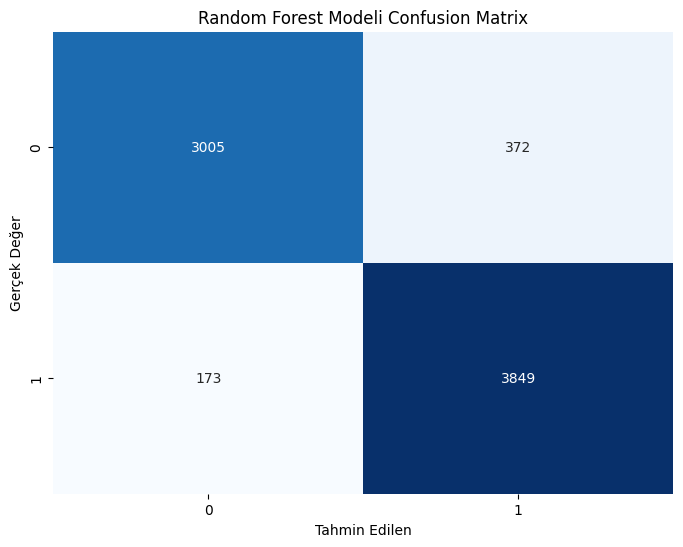

In [94]:
# Modelin performansını değerlendirecek confusion matrix görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_binary), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

## 8.2. Raporlama

In [95]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      3377
           1       0.91      0.96      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.92      0.93      7399
weighted avg       0.93      0.93      0.93      7399

